In [1]:
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import signal
#sns.set(style="darkgrid")

In [2]:
def Noise_Gen(tm,amp):
    noise=[]
    time=[]
    for i in range(tm):
        noise.append(np.random.normal(0,amp))
        time.append(i)
    return np.array(time), np.array(noise)

def Sig_Gen(tm,t0,w,amp):
    s=[]
    t=[]
    for i in range(tm):
        s.append(((np.sqrt(2*np.exp(1)))/w)*amp*(i-t0)*np.exp(-(i-t0)**2/(w**2)))
        t.append(i)
    return np.array(t), np.array(s)

def TS_Correlations(time,data,kernel):
    kernel=0.96787*np.sqrt(2)*kernel/np.sum(np.abs(kernel))
    output=[]
    tout=[]
    for i in range(len(data)):
        if i < len(data)-len(kernel):
            output.append(np.correlate(data[i:i+len(kernel)],kernel)[0])
            tout.append(time[int(i+len(kernel)/2)])
            
    return(tout,output)

In [ ]:
# This notebook is used to explore the impact of width mismatch between 
# a simulated DW signal, and the search kernel, when looking at simulated 
# and potentially noisy data. 

# This sets how coars/fine we need to vary the kernel width when we look 
# for the signal

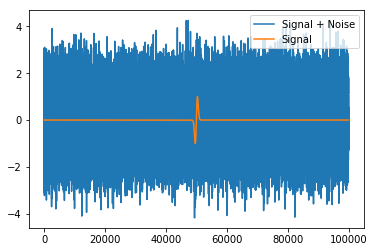

In [3]:
tlen=100000
swidth=500
t, noise =Noise_Gen(tlen,1)
t, sig = Sig_Gen(tlen,50000,swidth,1)
plt.show()
plt.plot(t,sig+noise,label='Signal + Noise')
plt.plot(t,sig,label='Signal')
plt.legend()
plt.show()

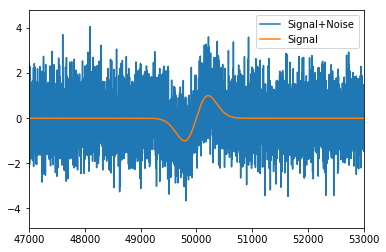

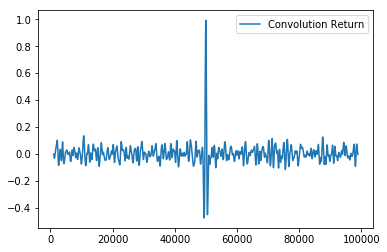

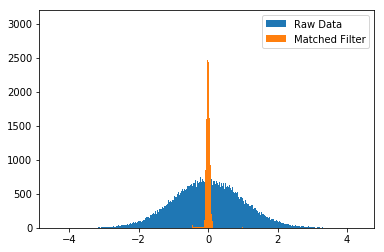

SNR at Peak


22.9969094385063

In [6]:
tlen=100000
swidth=300
t, noise =Noise_Gen(tlen,1)
t, sig = Sig_Gen(tlen,50000,swidth,1)

plt.plot(t,sig+noise,label='Signal+Noise')
plt.plot(t,sig,label='Signal')
plt.xlim([50000-10*swidth,50000+10*(swidth)])
plt.legend()
plt.show()

data=sig+noise
tmask, kernel=Sig_Gen(int(swidth*7),int(swidth*7/2),swidth,1)
tconv,sigconv=TS_Correlations(t,data,kernel)


plt.plot(tconv,sigconv,label='Convolution Return')
#plt.xlim([50000-10*swidth,50000+10*(swidth)])
plt.legend()
plt.show()


plt.hist(data,500,label='Raw Data')
plt.hist(sigconv,500,label='Matched Filter')
plt.legend()
plt.show()

print("SNR at Peak")
np.abs(sigconv[50000-int(7*swidth/2)])/np.std(sigconv[0:20000])

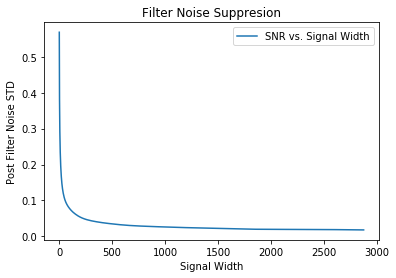

In [7]:
width_vec=[]
noise_vec=[]
swidth=2
for i in range(150):
    data=noise
    tmask, kernel=Sig_Gen(int(swidth*7),int(swidth*7/2),swidth,1)
    tconv,sigconv=TS_Correlations(t,data,kernel)
    
    width_vec.append(swidth)
    noise_vec.append(np.std(sigconv))
    
    swidth=swidth*1.05
    
plt.plot(width_vec,noise_vec,label='SNR vs. Signal Width')
plt.xlabel("Signal Width")
plt.ylabel("Post Filter Noise STD")
plt.title("Filter Noise Suppresion")
plt.legend()
plt.show()

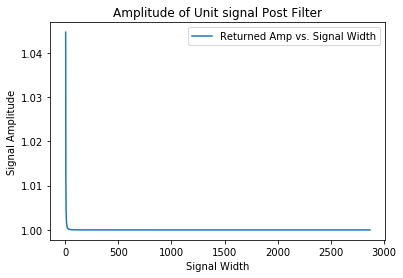

In [6]:
width_vec=[]
sig_vec=[]
swidth=2
for i in range(150):
    t, sig = Sig_Gen(tlen,50000,swidth,1)
    data=sig+noise*0
    tmask, kernel=Sig_Gen(int(swidth*7),int(swidth*7/2),swidth,1)
    tconv,sigconv=TS_Correlations(t,data,kernel)
    width_vec.append(swidth)
    sig_vec.append(np.abs(sigconv[50000-int(7*swidth/2)]))
    swidth=swidth*1.05

plt.plot(width_vec,sig_vec,label='Returned Amp vs. Signal Width')
plt.xlabel("Signal Width")
plt.ylabel("Signal Amplitude")
plt.title("Amplitude of Unit signal Post Filter")
plt.legend()
plt.show()

In [8]:
plt.plot(width_vec,np.divide(sig_vec,noise_vec),label='SNR vs. Signal Width')
plt.plot(width_vec,np.sqrt(width_vec))
plt.xlabel("Signal Width")
plt.ylabel("SNR")
plt.title("SNR for Unit signal in Unit Gaussian Noise")
plt.legend()
plt.show()

NameError: name 'sig_vec' is not defined

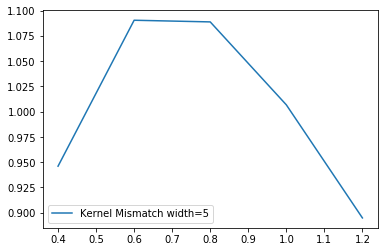

In [61]:
tlen=100000
swidth=5
t, noise =Noise_Gen(tlen,1)
t, sig = Sig_Gen(tlen,50000,swidth,1)
data=sig+noise*0

width_vec=(np.array([i for i in range(5)])-3)+swidth
fitmax=[]

for i in range(len(width_vec)):
    tmask, kernel=Sig_Gen(int(swidth*7),int(swidth*7/2),width_vec[i],1)
    tconv,sigconv=TS_Correlations(t,data,kernel)
    fitmax.append(np.max(np.abs(sigconv)))
    
    

plt.plot(width_vec/swidth, fitmax,label='Kernel Mismatch width=5')
#plt.xlim([.90,1.1])
plt.legend()
plt.show()
#So 10% step seem fine for small

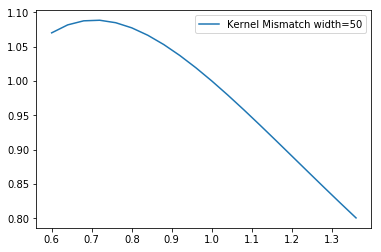

In [62]:
tlen=100000
swidth=50
t, noise =Noise_Gen(tlen,1)
t, sig = Sig_Gen(tlen,50000,swidth,1)
data=sig+noise*0

width_vec=(np.array([i for i in range(20)])-10)*2+swidth
fitmax=[]

for i in range(len(width_vec)):
    tmask, kernel=Sig_Gen(int(swidth*7),int(swidth*7/2),width_vec[i],1)
    tconv,sigconv=TS_Correlations(t,data,kernel)
    fitmax.append(np.max(np.abs(sigconv)))
    
    

plt.plot(width_vec/swidth, fitmax,label='Kernel Mismatch width=50')
#plt.xlim([.90,1.1])
plt.legend()
plt.show()
#So 10% step seem fine for small

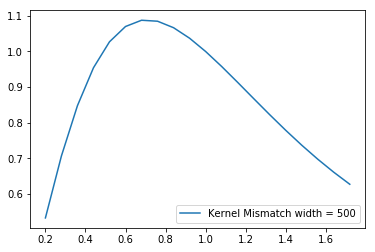

In [63]:
tlen=100000
swidth=500
t, noise =Noise_Gen(tlen,1)
t, sig = Sig_Gen(tlen,50000,swidth,1)
data=sig+noise*0


width_vec=(np.array([i for i in range(20)])-10)*40+swidth
fitmax=[]

for i in range(len(width_vec)):
    tmask, kernel=Sig_Gen(int(swidth*7),int(swidth*7/2),width_vec[i],1)
    tconv,sigconv=TS_Correlations(t,data,kernel)
    fitmax.append(np.max(np.abs(sigconv)))
    
plt.plot(width_vec/swidth, fitmax,label='Kernel Mismatch width = 500')
#plt.xlim([.90,1.1])
plt.legend()
plt.show()
#So 10% step seem fine for large    

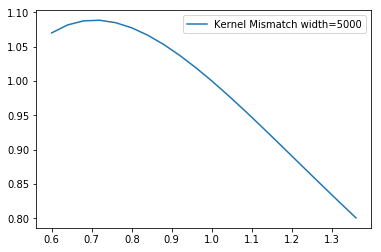

In [64]:
tlen=100000
swidth=5000
t, noise =Noise_Gen(tlen,1)
t, sig = Sig_Gen(tlen,50000,swidth,1)
data=sig+noise*0

width_vec=(np.array([i for i in range(20)])-10)*200+swidth
fitmax=[]

for i in range(len(width_vec)):
    tmask, kernel=Sig_Gen(int(swidth*7),int(swidth*7/2),width_vec[i],1)
    tconv,sigconv=TS_Correlations(t,data,kernel)
    fitmax.append(np.max(np.abs(sigconv)))
    
    

plt.plot(width_vec/swidth, fitmax,label='Kernel Mismatch width=5000')
#plt.xlim([.90,1.1])
plt.legend()
plt.show()
#So 10% step seem fine for small

In [ ]:
# Conclusion, the filter width doesn't need to be matched very well.